In [21]:
import sys
sys.path.append('../src')

import importlib
import dyn_accept_loop as dal
import logreg_augmented as lra
importlib.reload(dal)

import matplotlib.pyplot as plt

import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import torch

## Test importable Dynamic Acceptance Loop

Itteration: 0) Accepted: 3281 | Denied: 2794 - New train set size: (18281, 68)
Itteration: 1) Accepted: 3122 | Denied: 2953 - New train set size: (21403, 68)
Itteration: 2) Accepted: 3321 | Denied: 2754 - New train set size: (24724, 68)
Itteration: 3) Accepted: 3162 | Denied: 2913 - New train set size: (27886, 68)
Itteration: 4) Accepted: 3386 | Denied: 2689 - New train set size: (31272, 68)
Itteration: 5) Accepted: 3436 | Denied: 2639 - New train set size: (34708, 68)
Itteration: 6) Accepted: 3369 | Denied: 2706 - New train set size: (38077, 68)
Itteration: 7) Accepted: 3596 | Denied: 2479 - New train set size: (41673, 68)
Itteration: 8) Accepted: 3336 | Denied: 2739 - New train set size: (45009, 68)
Itteration: 9) Accepted: 3226 | Denied: 2849 - New train set size: (48235, 68)
Itteration: 10) Accepted: 3293 | Denied: 2782 - New train set size: (51528, 68)
Itteration: 11) Accepted: 2989 | Denied: 3086 - New train set size: (54517, 68)
Itteration: 12) Accepted: 3307 | Denied: 2768 - Ne

c:\Projects\Information-Systems-Seminar\.venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Itteration: 14) Accepted: 3331 | Denied: 2744 - New train set size: (64503, 68)


c:\Projects\Information-Systems-Seminar\.venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Itteration: 15) Accepted: 3316 | Denied: 2759 - New train set size: (67819, 68)
Itteration: 16) Accepted: 3613 | Denied: 2462 - New train set size: (71432, 68)
Itteration: 17) Accepted: 3133 | Denied: 2942 - New train set size: (74565, 68)
Itteration: 18) Accepted: 3313 | Denied: 2762 - New train set size: (77878, 68)
Itteration: 19) Accepted: 3511 | Denied: 2564 - New train set size: (81389, 68)


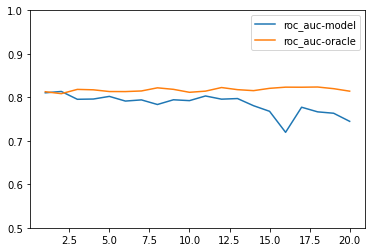

In [24]:
n_years = 20

model = DecisionTreeClassifier(min_samples_leaf=40) #lgbm.LGBMClassifier() #LogisticRegression(max_iter=400)

sim = dal.Simulate_acceptance_loop("gmsc.csv", model, 0.1, 0.1, n_years, norm_features=True)
results_generator = sim.run()

metrics = None
for iteration in results_generator:
    print(f'Itteration: {iteration[0]}) Accepted: {iteration[1].count(True)} | Denied: {iteration[1].count(False)} - New train set size: {iteration[2]}')
    metrics = iteration[3]
    
x = range(1, n_years + 1)
plt.plot(x, metrics["model"]["holdout"]['roc_auc'], label = 'roc_auc-model')
plt.plot(x, metrics["oracle"]["holdout"]['roc_auc'], label = 'roc_auc-oracle')
#plt.plot(x, results["holdout"]['precision'], label = 'precision')
#plt.plot(x, results["holdout"]['f1'], label = 'f1')
#plt.plot(x, results["holdout"]['accuracy'], label = 'accuracy')
plt.legend()
plt.ylim([0.5, 1.0])
plt.show()

## Test importable Autoencoder

In [3]:
import autoencoder as aenc
import importlib
importlib.reload(aenc)

<module 'autoencoder' from 'c:\\Projects\\Information-Systems-Seminar\\reject-infer-autoencoder\\notebooks\\../src\\autoencoder.py'>

Autoencoder(
  (enc): ModuleList(
    (0): Linear(in_features=68, out_features=55, bias=True)
    (1): Linear(in_features=55, out_features=40, bias=True)
  )
  (dec): ModuleList(
    (0): Linear(in_features=40, out_features=55, bias=True)
    (1): Linear(in_features=55, out_features=68, bias=True)
  )
)
Epoch 1 of 50, Train Loss: 0.750
Epoch 2 of 50, Train Loss: 0.551
Epoch 3 of 50, Train Loss: 0.516
Epoch 4 of 50, Train Loss: 0.503
Epoch 5 of 50, Train Loss: 0.498
Epoch 6 of 50, Train Loss: 0.496
Epoch 7 of 50, Train Loss: 0.495
Epoch 8 of 50, Train Loss: 0.494
Epoch 9 of 50, Train Loss: 0.493
Epoch 10 of 50, Train Loss: 0.491
Epoch 11 of 50, Train Loss: 0.491
Epoch 12 of 50, Train Loss: 0.490
Epoch 13 of 50, Train Loss: 0.490
Epoch 14 of 50, Train Loss: 0.489
Epoch 15 of 50, Train Loss: 0.489
Epoch 16 of 50, Train Loss: 0.489
Epoch 17 of 50, Train Loss: 0.488
Epoch 18 of 50, Train Loss: 0.488
Epoch 19 of 50, Train Loss: 0.488
Epoch 20 of 50, Train Loss: 0.488
Epoch 21 of 50, Train Lo

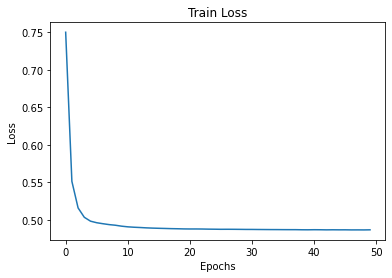

In [4]:
BATCH_SIZE = 1000
EPOCHS = 50

dataset = aenc.CreditscoringDataset("gmsc.csv")      # load and prepare Dataset to Tensor
data_loader = aenc.DataLoader(                       # create Dataloader for batching
    dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)

shape = [dataset.x.shape[1], 55, 40, 55, dataset.x.shape[1]]  # define shape of Autoencoder
net = aenc.Autoencoder(shape)
print(net)
net.to("cpu")

train_loss = aenc.train(net, data_loader, EPOCHS)               

plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [5]:
# Use trained Autoencoder
net.encode(torch.rand(10, 68))

tensor([[1.6062e+00, 4.0604e-01, 9.1000e-01, 5.7796e-01, 1.0906e+00, 1.3883e-01,
         9.5549e-01, 1.3537e+00, 4.7863e-01, 1.6145e+00, 1.1377e-01, 6.3467e-01,
         0.0000e+00, 2.7476e-01, 1.0936e+00, 1.8979e+00, 7.7384e-01, 6.6722e-01,
         1.6689e+00, 1.3562e+00, 1.4664e+00, 5.7945e-01, 7.9301e-01, 2.1931e+00,
         0.0000e+00, 0.0000e+00, 2.3575e-01, 0.0000e+00, 8.6294e-01, 7.0914e-01,
         9.1143e-01, 2.2663e+00, 2.1649e-01, 8.6285e-01, 0.0000e+00, 6.0868e-01,
         6.0203e-01, 1.3706e+00, 1.0976e+00, 0.0000e+00],
        [2.3080e+00, 1.1507e+00, 1.0966e+00, 4.2163e-01, 1.8984e+00, 7.0873e-01,
         8.9469e-01, 2.3891e+00, 6.0061e-01, 2.1753e+00, 5.4118e-01, 1.7279e+00,
         6.4610e-01, 1.3064e+00, 2.2418e+00, 3.2874e+00, 1.6164e+00, 1.2872e+00,
         1.8422e+00, 2.5998e+00, 2.3791e+00, 1.4368e+00, 1.4597e+00, 1.9710e+00,
         0.0000e+00, 0.0000e+00, 7.4779e-01, 0.0000e+00, 1.7100e+00, 2.3680e+00,
         1.3002e+00, 2.2605e+00, 0.0000e+00, 2.1691